In [1]:
# Load project functions
import crypto_monetary_base as cmb

In [2]:
import pandas as pd
import datetime
from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set()
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.labelpad'] = 10
mpl.rc('text', usetex=True)
plt.style.use('ggplot')

from IPython.display import display

In [3]:
%load_ext version_information
%version_information pandas, matplotlib, seaborn

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 6.4.0
OS Darwin 16.7.0 x86_64 i386 64bit
pandas 0.23.0
matplotlib 2.2.2
seaborn 0.9.0
Wed Dec 26 11:32:26 2018 EST

## Supply Curve Calculation

In [4]:
COIN_SYMBOL = 'ZEC'

In [5]:
def zec_block_supply_curve(max_size=None):
    out = [
        # Block num,
        # Total supply,
    ]
    block_reward = 50
    inflation_change_frac=0.5
    inflation_change_blocks=840960   # Change every 4 years
    max_supply = 21 * 1e6
    
    y = 0
    max_blocks = 10512000    # Breakpoint 50 years from now
    
    # Mex size to prevent memory overflows
    if max_size is not None:
        block_freq = int(max_blocks / _max_size)
    else:
        block_freq = 1
        
    for block in tqdm_notebook(range(max_blocks)):
        if block < 20000:
            block_reward = 12.5 * (block / 20000)
        else:
            num_changes = int(
                block / inflation_change_blocks
            )
            block_reward = 12.5 * (
                inflation_change_frac ** num_changes
            )
            if block % inflation_change_blocks == 0:
                print(
                    f'Inflation change #{num_changes}, '
                    f'block reward = {block_reward}'
                )
        y += block_reward
        if block % block_freq == 0:
            out.append([block, min((y, max_supply))])

    return out, block_freq

In [6]:
start_date = datetime.date(2016, 10, 29)
block_time = datetime.timedelta(seconds=60*2.5)

_max_size = 10000
block_supply, _block_freq = zec_block_supply_curve(_max_size)

supply = cmb.datetime_supply_curve(
    start_date=start_date,
    block_time=block_time*_block_freq,
    block_supply=block_supply,
)

Inflation change #1, block reward = 6.25
Inflation change #2, block reward = 3.125
Inflation change #3, block reward = 1.5625
Inflation change #4, block reward = 0.78125
Inflation change #5, block reward = 0.390625
Inflation change #6, block reward = 0.1953125
Inflation change #7, block reward = 0.09765625
Inflation change #8, block reward = 0.048828125
Inflation change #9, block reward = 0.0244140625
Inflation change #10, block reward = 0.01220703125
Inflation change #11, block reward = 0.006103515625
Inflation change #12, block reward = 0.0030517578125



,block,total_supply,total_supply_pct,date
0,0,0.000000,0.000000,2016-10-29 00:00:00
1,1051,345.516250,0.001654,2016-10-30 19:47:30
2,2102,1381.408125,0.006611,2016-11-01 15:35:00
3,3153,3107.675625,0.014873,2016-11-03 11:22:30
4,4204,5524.318750,0.026438,2016-11-05 07:10:00


,block,total_supply,total_supply_pct,date
9997,10506847,2.089513e+07,99.999939,2066-10-08 01:17:30
9998,10507898,2.089513e+07,99.999954,2066-10-09 21:05:00
9999,10508949,2.089513e+07,99.999969,2066-10-11 16:52:30
10000,10510000,2.089514e+07,99.999985,2066-10-13 12:40:00
10001,10511051,2.089514e+07,100.000000,2066-10-15 08:27:30


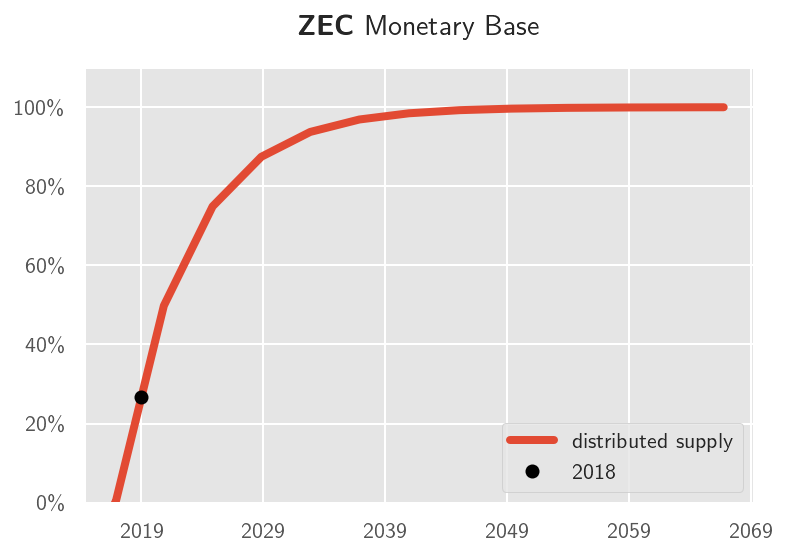

In [7]:
display(supply.head())
display(supply.tail())

cmb.plot_supply_curve(
    supply,
    'ZEC',
    ylim=(0, 110),
);

## Standardize Time Series

In [8]:
weekly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='weekly')

display(weekly_supply.head())
display(weekly_supply.tail())

Wrote 2608 lines to file ../output-data/ZEC_weekly.csv


,coin,block,total_supply,total_supply_pct,date
0,ZEC,0,0.000000,0.000000,2016-10-01
1,ZEC,2102,1381.408125,0.006611,2016-11-01
2,ZEC,5255,8631.337500,0.041308,2016-11-01
3,ZEC,9459,27963.168750,0.133826,2016-11-01
4,ZEC,13663,58341.010000,0.279208,2016-11-01


,coin,block,total_supply,total_supply_pct,date
2603,ZEC,10493184,2.089509e+07,99.999739,2066-09-01
2604,ZEC,10497388,2.089510e+07,99.999800,2066-09-01
2605,ZEC,10500541,2.089511e+07,99.999847,2066-09-01
2606,ZEC,10504745,2.089512e+07,99.999908,2066-10-01
2607,ZEC,10508949,2.089513e+07,99.999969,2066-10-01


In [9]:
monthly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='monthly')

display(monthly_supply.head())
display(monthly_supply.tail())

Wrote 601 lines to file ../output-data/ZEC_monthly.csv


,coin,block,total_supply,total_supply_pct,date
0,ZEC,0,0.000000,0.000000,2016-10-01
1,ZEC,2102,1381.408125,0.006611,2016-11-01
2,ZEC,19969,124619.040625,0.596402,2016-12-01
3,ZEC,37836,347956.250000,1.665250,2017-01-01
4,ZEC,55703,571293.750000,2.734099,2017-02-01


,coin,block,total_supply,total_supply_pct,date
596,ZEC,10433277,2.089490e+07,99.998864,2066-06-01
597,ZEC,10450093,2.089496e+07,99.999110,2066-07-01
598,ZEC,10467960,2.089501e+07,99.999371,2066-08-01
599,ZEC,10485827,2.089506e+07,99.999632,2066-09-01
600,ZEC,10503694,2.089512e+07,99.999893,2066-10-01


In [10]:
yearly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='yearly')

display(yearly_supply.head())
display(yearly_supply.tail())

Wrote 51 lines to file ../output-data/ZEC_yearly.csv


,coin,block,total_supply,total_supply_pct,date
0,ZEC,0,0.00,0.000000,2016-10-01
1,ZEC,37836,347956.25,1.665250,2017-01-01
2,ZEC,248036,2975456.25,14.239943,2018-01-01
3,ZEC,458236,5602956.25,26.814637,2019-01-01
4,ZEC,668436,8230456.25,39.389331,2020-01-01


,coin,block,total_supply,total_supply_pct,date
46,ZEC,9504193,2.089028e+07,99.976717,2062-01-01
47,ZEC,9714393,2.089156e+07,99.982857,2063-01-01
48,ZEC,9924593,2.089284e+07,99.988997,2064-01-01
49,ZEC,10135844,2.089400e+07,99.994520,2065-01-01
50,ZEC,10346044,2.089464e+07,99.997590,2066-01-01
